# Prosper Loan Dataset Exploration
## by Audrey S Tan

## Preliminary Wrangling

- The original [dataset](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) contains 113,937 loan listing observations came an online peer-to-peer lending company [Prosper Marketplace](https://en.wikipedia.org/wiki/Prosper_Marketplace). There are 81 variables in the data, including loan amount, borrower rate, current loan status, borrower income, and many others. A data feature dictionary describing the variables is available [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000).


- We will analyzing a subset of loans originated between **1 July 2008** and **31 December 2009**, during which three historical significant events - the _**2008 Great Recession**_, _**Novemer 2008 SEC cease and desist order on Prosper Marketplace**_ and its _**July 2009 Post SEC Relaunch**_ took place. 


- We will explore features relating to Prosper borrowers, loan listings and time periods in the dataset to discover their influences on Prosper loan distributions, and the effect of the three historical significant events on loan listings in that period.


- We extracted a subset of 6,181 observations and 24 variables from the original dataset and will put it through a preliminary wrangling process to prepare the data for our exploration.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Load dataset and begin assessing the data to determine wrangling steps required to get the features of interest.

In [2]:
df_loan=pd.read_csv('prosperLoanData_src.csv')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 24 columns):
ListingCreationDate            6181 non-null object
CreditGrade                    4147 non-null object
Term                           6181 non-null int64
LoanStatus                     6181 non-null object
ClosedDate                     6181 non-null object
BorrowerAPR                    6181 non-null float64
ProsperRating (Alpha)          1976 non-null object
ProsperScore                   1976 non-null float64
ListingCategory (numeric)      6181 non-null int64
BorrowerState                  6181 non-null object
Occupation                     6181 non-null object
EmploymentStatus               6181 non-null object
IsBorrowerHomeowner            6181 non-null bool
GroupKey                       652 non-null object
CurrentDelinquencies           6181 non-null float64
AmountDelinquent               6181 non-null float64
DebtToIncomeRatio              5453 non-null float64
StatedMon

In [3]:
# set panda max column display to 24 to see all columns of interest 
pd.set_option('display.max_columns', 24)
df_loan.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,GroupKey,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanKey,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,LoanOriginationDate,MemberKey
0,2008-08-05 19:42:49.197000000,C,36,Completed,2010-01-29 00:00:00,0.17170,NaN,NaN,1,IL,Accountant/CPA,Full-time,False,AD9A3400384972497EDAD38,0.0,0.0,0.27,3166.666667,14EE3428953999691D705E3,6000.0,4317.11,4000,2008-08-15 00:00:00,98C934028624318592C6882
1,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.18454,NaN,NaN,3,CA,Realtor,Full-time,True,NaN,0.0,0.0,NaN,0.000000,B8483424568930207C77772,7750.0,6725.84,4800,2008-07-08 00:00:00,D77734052911579724BCDD5
2,2009-08-25 13:37:08.130000000,NaN,36,Completed,2012-09-15 00:00:00,0.15529,A,9.0,1,MD,Professional,Full-time,True,NaN,0.0,0.0,0.16,15000.000000,60B735657994093942AA7B2,15000.0,10218.19,10000,2009-09-15 00:00:00,B41334062857898874757F4
3,2008-09-02 13:09:30.613000000,AA,36,Completed,2009-04-23 00:00:00,0.13223,NaN,NaN,3,NJ,Sales - Retail,Full-time,False,NaN,0.0,0.0,0.19,2293.333333,1B283432345422184E85AFC,NaN,NaN,12000,2008-09-16 00:00:00,81253427867932832C43EA9
4,2008-09-11 03:34:20.130000000,A,36,Completed,2011-09-23 00:00:00,0.20623,NaN,NaN,1,SC,Other,Part-time,False,NaN,0.0,0.0,NaN,833.333333,68203431874992959C510A1,NaN,NaN,12500,2008-09-23 00:00:00,B54D342854423575513E3B5


In [4]:
# check descriptive statistics on the dataset
df_loan[['BorrowerAPR','StatedMonthlyIncome','LoanOriginalAmount','AmountDelinquent',
    'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding']].describe()

,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount,AmountDelinquent,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,6181.000000,6181.000000,6181.000000,6181.000000,1465.000000,1465.000000
mean,0.219283,4859.542348,5124.938359,638.290244,6130.168594,2127.707945
std,0.095184,3636.541582,4920.647103,4328.868902,5631.987100,2936.175884
min,0.013150,0.000000,1000.000000,0.000000,1000.000000,0.000000
25%,0.137050,2796.333333,1800.000000,0.000000,2500.000000,0.000000
50%,0.202100,4166.666667,3400.000000,0.000000,4500.000000,1161.290000
75%,0.294460,6000.000000,6500.000000,0.000000,8000.000000,3130.550000
max,0.413550,83333.333333,25000.000000,161475.000000,40000.000000,20182.970000


In [5]:
# check unique credit ranking codes in CreditGrade feature
df_loan.CreditGrade.unique()

array(['C', 'A', nan, 'AA', 'B', 'E', 'HR', 'D'], dtype=object)

In [6]:
# Check unique credit ranking codes in ProsperRating (Alpha) feature
df_loan['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'AA', 'C', 'HR', 'E', 'D', 'B'], dtype=object)

In [7]:
# check unique borrower occupations
df_loan.Occupation.unique()

array(['Accountant/CPA', 'Realtor', 'Professional', 'Sales - Retail',
       'Other', 'Sales - Commission', 'Administrative Assistant',
       'Construction', 'Laborer', 'Executive', 'Medical Technician',
       'Retail Management', 'Food Service', 'Postal Service', 'Principal',
       'Teacher', 'Analyst', 'Engineer - Mechanical', 'Truck Driver',
       'Tradesman - Mechanic', 'Computer Programmer',
       'Food Service Management', 'Police Officer/Correction Officer',
       'Civil Service', 'Nurse (RN)', 'Pilot - Private/Commercial',
       'Fireman', 'Clerical', 'Engineer - Electrical',
       'Tradesman - Electrician', 'Student - College Sophomore', 'Clergy',
       'Religious', 'Military Officer', 'Waiter/Waitress', 'Attorney',
       'Skilled Labor', 'Pharmacist', 'Social Worker', 'Doctor',
       'Military Enlisted', "Nurse's Aide", 'Professor', 'Car Dealer',
       'Student - College Graduate Student', 'Nurse (LPN)',
       'Flight Attendant', 'Scientist', 'Student - College S

In [8]:
# Count the number of unique occupations
len(df_loan.Occupation.unique())

67

In [9]:
# check unique employment statuses
df_loan.EmploymentStatus.unique()

array(['Full-time', 'Part-time', 'Self-employed', 'Retired',
       'Not employed'], dtype=object)

In [10]:
# check unique loan statuses
df_loan.LoanStatus.unique()

array(['Completed', 'Chargedoff', 'Defaulted', 'Cancelled'], dtype=object)

In [11]:
# check unique loan terms
df_loan.Term.unique()

array([36])

### From inspecting the data above and looking at the its [data feature dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000), we know the following wrangling steps are necessary to derive our target clean dataset :
1. Per the data feature dictionary, alphabatic credit rating of loan listing created pre and post Jul 2009 are stored in _**CreditGrade**_ and _**ProsperRating(Alpha)**_ variables. The two can be merged into one on a same ranking scheme `AA` - `HR`. The numeric rating in _**ProsperScore**_ is only applicable to listings post Jul 2009, not particularly useful for our purpose and can be ignored.  


2. There are 67 occupations listed, too many and detailed for our purpose. They can be grouped into to 9 categories broadly based on [International Standard Classification of Occupations ISCO](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Occupations).


3. _**ProsperPrincipalBorrowed**_ and _**ProsperPrincipalOutstanding**_ are snapshots of _**total principal borrowed**_ and _**total principal outstanding**_ taken at the time the loan listing was created. **The value will be null if the borrower had no prior loans**. We will engineer two variables to hold store principal amount borrowed and principal outstanding **inclusive** of loan listing for all borrowers. 


4. Further pare down variables not useful or not of interest in the dataset:
   * Term - given all loan listings were of 36 months term
   * DebtToIncomeRatio - not populated for all borrowers and no way to find the missing data
   * ListingCreationDate, IsBorrowerHomeowner, GroupKey, CurrentDelinquencies - not useful or of interest for our purpose


5. Convert date columns to datetime format and save the clean dataset for exploration.

### Let's start our data wrangling ...
#### Merge CreditGrade, ProsperRating(Alpha) columns into one and tidy up 

In [12]:
# Merge CreditGrade, ProsperRating(Alpha) columns into one
rating_cols = ['CreditGrade','ProsperRating (Alpha)']
other_cols = df_loan.columns.difference(rating_cols)
dfcr= df_loan.melt(id_vars = other_cols, value_vars = rating_cols, 
                          var_name = 'CrRankType', value_name = 'CrRanking')

# Drop the redundant null value rows from the merged column
df = dfcr[~dfcr.CrRanking.isnull()]
df.shape

(6123, 24)

#### Further pare down the number of variables to what we need only

In [13]:
# Make a copy
dfcr_ori=df.copy()

# Keep only necessary variables for our purpose
df=dfcr_ori[['MemberKey',
'CrRanking',
'CrRankType',              
'LoanStatus',
'ClosedDate',
'BorrowerAPR',
'ListingCategory (numeric)',
'BorrowerState',
'Occupation',
'StatedMonthlyIncome',               
'EmploymentStatus',             
'LoanOriginalAmount',
'LoanOriginationDate',                 
'AmountDelinquent',               
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding'             
]].copy()

#### Remap the 67 occupations into 9 categories loosely based on [ISCO classification standard](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Occupations)

In [14]:
jobCat_dict = {
    'Accountant/CPA': 'Professional',
    'Professionals': 'Professional',
    'Police Officer/Correction Officer': 'Professional',
    'Sales - Retail': 'Service and Sales',
    'Administrative Assistant': 'Clerical',
    'Other': 'Other',
    'Construction': 'Elementary Worker',
    'Executive': 'Manager',
    'Medical Technician': 'Associate Professional',
    'Truck Driver': 'Machine Operator',
    'Food Service': 'Service and Sales',
    'Postal Service': 'Clerical',
    'Principal': 'Professional',
    'Teacher': 'Professional',
    'Analyst': 'Professional',
    'Engineer - Mechanical': 'Professional',
    'Computer Programmer': 'Professional',
    'Civil Service': 'Professional',
    'Nurse (RN)': 'Associate Professional',
    'Pilot - Private/Commercial': 'Professional',
    'Fireman': 'Associate Professional',
    'Sales - Commission': 'Service and Sales',
    'Clerical': 'Clerical',
    'Engineer - Electrical': 'Professional',
    'Tradesman - Electrician': 'Associate Professional',
    'Retail Management': 'Manager',
    'Laborer': 'Elementary Worker',
    'Student - College Sophomore': 'Other',
    'Clergy': 'Professional',
    'Military Officer': 'Armed Forces',
    'Food Service Management': 'Manager',
    'Military Enlisted': 'Armed Forces',
    'Waiter/Waitress': 'Service and Sales',
    'Attorney': 'Professional',
    'Tradesman - Mechanic': 'Associate Professional',
    'Pharmacist': 'Professional',
    'Social Worker': 'Associate Professional',
    'Skilled Labor': 'Other',
    'Realtor': 'Professional',
    'Religious': 'Professional',
    'Professor': 'Professional',
    'Flight Attendant': 'Service and Sales',
    'Scientist': 'Professional',
    'Student - College Senior': 'Other',
    'Nurse (LPN)': 'Professional',
    'Investor': 'Other',
    "Teacher's Aide": 'Clerical',
    'Bus Driver': 'Elementary Worker',
    'Student - College Freshman': 'Other',
    'Car Dealer': 'Other',
    'Homemaker': 'Other',
    "Nurse's Aide": 'Associate Professional',
    'Architect': 'Professional',
    'Landscaping': 'Elementary Worker',
    'Doctor': 'Professional',
    'Student - College Graduate Student': 'Other',
    'Tradesman - Carpenter': 'Associate Professional',
    'Student - College Junior': 'Other',
    'Dentist': 'Professional',
    'Student - Technical School': 'Other',
    'Student - Community College': 'Other',
    'Engineer - Chemical': 'Professional',
    'Tradesman - Plumber': 'Associate Professional',
    'Chemist': 'Professional',
    'Biologist': 'Professional',
    'Psychologist': 'Professional',
    'Judge': 'Professional'
}    

df['Occupation'].replace(jobCat_dict, inplace=True)
df.Occupation.value_counts()

Professional              2340
Other                     1684
Service and Sales          485
Clerical                   476
Manager                    424
Associate Professional     313
Elementary Worker          212
Armed Forces               134
Machine Operator            55
Name: Occupation, dtype: int64

#### Engineer variables to hold total loan amount and total outstanding (inclusive of loan listing) for all borrowers

In [15]:
# Copy the original columns to new columns
df['PrinBorrowed']=df['ProsperPrincipalBorrowed']
df['PrinOS']=df['ProsperPrincipalOutstanding']

# Repurpose the columns to hold total principal amount borrowed and total outstanding for all borrowers  
df['ProsperPrincipalBorrowed'] = np.where(df.ProsperPrincipalBorrowed.isna(),
                                          df.LoanOriginalAmount,
                                          df.ProsperPrincipalBorrowed+df.LoanOriginalAmount)
df['ProsperPrincipalOutstanding'] = np.where(df.ProsperPrincipalOutstanding.isna(),
                                             df.LoanOriginalAmount,
                                             df.ProsperPrincipalOutstanding+df.LoanOriginalAmount)

#### Convert date columns to datetime type, save the clean dataset

In [16]:
# convert all date columns to datetime data type
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6123 entries, 0 to 12357
Data columns (total 18 columns):
MemberKey                      6123 non-null object
CrRanking                      6123 non-null object
CrRankType                     6123 non-null object
LoanStatus                     6123 non-null object
ClosedDate                     6123 non-null datetime64[ns]
BorrowerAPR                    6123 non-null float64
ListingCategory (numeric)      6123 non-null int64
BorrowerState                  6123 non-null object
Occupation                     6123 non-null object
StatedMonthlyIncome            6123 non-null float64
EmploymentStatus               6123 non-null object
LoanOriginalAmount             6123 non-null int64
LoanOriginationDate            6123 non-null datetime64[ns]
AmountDelinquent               6123 non-null float64
ProsperPrincipalBorrowed       6123 non-null float64
ProsperPrincipalOutstanding    6123 non-null float64
PrinBorrowed                   1441 non-n

In [17]:
# save the clean copy
df.to_csv('prosperLoanData.csv', index = False)

## Data Exploration

In [18]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [19]:
sb.set_style('dark', {'xtick.bottom': True})
pcolor=sb.color_palette('Dark2', 8)[0]

In [20]:
# load the clean dataset
pd.set_option('display.max_columns', 24)
df=pd.read_csv('prosperLoanData.csv')

df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])

df.head()

,MemberKey,CrRanking,CrRankType,LoanStatus,ClosedDate,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,LoanOriginationDate,AmountDelinquent,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,PrinBorrowed,PrinOS
0,98C934028624318592C6882,C,CreditGrade,Completed,2010-01-29,0.17170,1,IL,Professional,3166.666667,Full-time,4000,2008-08-15,0.0,10000.0,8317.11,6000.0,4317.11
1,D77734052911579724BCDD5,A,CreditGrade,Chargedoff,2009-04-09,0.18454,3,CA,Professional,0.000000,Full-time,4800,2008-07-08,0.0,12550.0,11525.84,7750.0,6725.84
2,81253427867932832C43EA9,AA,CreditGrade,Completed,2009-04-23,0.13223,3,NJ,Service and Sales,2293.333333,Full-time,12000,2008-09-16,0.0,12000.0,12000.00,NaN,NaN
3,B54D342854423575513E3B5,A,CreditGrade,Completed,2011-09-23,0.20623,1,SC,Other,833.333333,Part-time,12500,2008-09-23,0.0,12500.0,12500.00,NaN,NaN
4,BFEF34233857841805B8453,C,CreditGrade,Completed,2011-07-02,0.21679,3,CT,Service and Sales,3333.333333,Full-time,3000,2008-07-02,0.0,3000.0,3000.00,NaN,NaN


In [21]:
# Check descriptive statistics of the dataset
df[['StatedMonthlyIncome','LoanOriginalAmount','AmountDelinquent',
    'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
    'PrinBorrowed','PrinOS']].describe()

,StatedMonthlyIncome,LoanOriginalAmount,AmountDelinquent,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,PrinBorrowed,PrinOS
count,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,1441.000000,1441.000000
mean,4859.406949,5136.127552,644.156296,6582.080514,5642.348445,6144.045795,2150.999674
std,3643.761417,4933.180698,4348.892534,6427.511554,5290.936940,5645.498958,2949.275148
min,0.000000,1000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000
25%,2791.666667,1800.000000,0.000000,2000.000000,2000.000000,2500.000000,0.000000
50%,4166.666667,3400.000000,0.000000,4600.000000,4000.000000,4500.000000,1186.760000
75%,6000.000000,6500.000000,0.000000,8900.000000,7500.000000,8000.000000,3159.770000
max,83333.333333,25000.000000,161475.000000,50999.000000,25000.000000,40000.000000,20182.970000


In [22]:
# Make a dataframe to hold new variables for use in our exploration   
df2=df[['CrRanking','CrRankType',
        'ListingCategory (numeric)','StatedMonthlyIncome',
        'LoanOriginalAmount','ProsperPrincipalBorrowed',
        'BorrowerAPR']].copy()

# Convert APR to percent
df2['APRPct'] = df2.BorrowerAPR.apply(lambda x: x * 100)
df2.CrRankType.replace({'CreditGrade':'Pre 2009-07','ProsperRating (Alpha)':'Post 2009-07'},inplace=True)

# Map numeric Listing Category codes to descriptive names  
df2.rename(columns={'ListingCategory (numeric)': 'LoanCat'},inplace=True)
df2.LoanCat = df2.LoanCat.astype(str)
df2.LoanCat.replace({'1': 'Debt Consolidation', '2': 'Home Improvement',
                     '3': 'Business', '4': 'Personal', '5': 'Student',
                     '6': 'Auto', '7': 'Other'},inplace=True)                                         

df2.head()

,CrRanking,CrRankType,LoanCat,StatedMonthlyIncome,LoanOriginalAmount,ProsperPrincipalBorrowed,BorrowerAPR,APRPct
0,C,Pre 2009-07,Debt Consolidation,3166.666667,4000,10000.0,0.17170,17.170
1,A,Pre 2009-07,Business,0.000000,4800,12550.0,0.18454,18.454
2,AA,Pre 2009-07,Business,2293.333333,12000,12000.0,0.13223,13.223
3,A,Pre 2009-07,Debt Consolidation,833.333333,12500,12500.0,0.20623,20.623
4,C,Pre 2009-07,Business,3333.333333,3000,3000.0,0.21679,21.679


### What is the structure of your dataset?

There are 6,123 loan listings in the dataset with 16 features (excluding the 2 ID variables for identifying borrowers and loan listings) for our exploration. The variables are mostly quantitative but there are a few categorical like credit ranking, loan status, borrower occupation, state and employment status.      

### What is/are the main feature(s) of interest in your dataset?

We are most interested in checking out features relating to borrower demographics, loan listings and time periods to discover their influences on listing distributions, and understand the effect of the _**Great Recession**_ , _**SEC's cease and desist order on Prosper Marketplace**_ and its _**Post SEC Relaunch**_ events on Prosper loan listings.     

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We will be inspecting these features  
* _**Borrower demographics and loans listings**_
  - CrRanking, CrRankType, BorrowerAPR, BorrowerState, Occupation, StatedMonthlyIncome, EmploymentStatus, LoanStatus, ListingCategory, LoanOriginalAmount, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, PrinBorrowed, PrinOS


* _**What effect the 3 historical significant events might have on loan listings**_
  - LoanOriginationDate, ProsperPrincipalBorrowed, AmountDelinquent 

## Univariate Exploration

We will start by examining features pertaining to borrowers' demographics, loan categories to discover variations of listing distributions.     

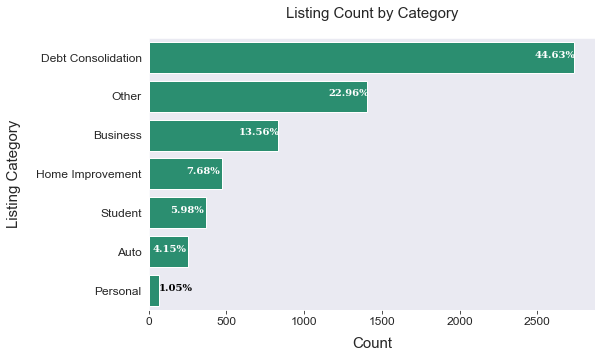

In [23]:
# What are the available Listing cateogories ? 
lc_cnt=df2.LoanCat.value_counts()
lc_pct=df2.LoanCat.value_counts()/df.shape[0]*100

plt.figure(figsize=[ 8, 5])
ax = sb.countplot(y='LoanCat', data=df2, order=df2.LoanCat.value_counts().index, color=pcolor)

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = lc_cnt[label.get_text()]
    pct = lc_pct[label.get_text()]
    if pct>=4:
        plt.text(cnt-120, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(cnt+110, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
        
plt.ylabel('Listing Category', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Category', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('01lcatCnt.png');

### Commentary and next step 
_**Debt Consolidation**_ category has the largest portion of listings at 44.63%, followed by _**Other**_, _**Business**_, _**Home Improvement**_, _**student**_, _**Auto**_ and _**Personal**_ categories. Interestingly, _**Other**_ category is about halve the volume of _**Debt Consolidation**_'s, _**Business**_, slightly over halve of that of _**Other**_'s, and _**Home Improvement**_, nearly halve of that _**Business**_'s. _**Personal**_ category has the lightest volume at 1.05%. We can see most borrowers took up the loans for debt consolidation, other and business purposes. 

**Next**, we will take a look at occupations of borrowers.

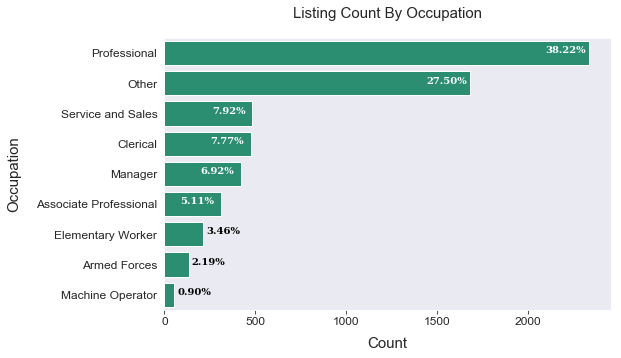

In [24]:
oc_cnt=df.Occupation.value_counts()
oc_pct=df.Occupation.value_counts()/df.shape[0]*100

plt.figure(figsize=[ 8, 5])
ax = sb.countplot(y='Occupation', data=df, order=df.Occupation.value_counts().index, color=pcolor)

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = oc_cnt[label.get_text()]
    pct = oc_pct[label.get_text()]
    if pct>=4:
        plt.text(cnt-130, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(cnt+110, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
        
plt.ylabel('Occupation', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count By Occupation', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('02occCnt.png');

### Commentary and next step
_**Professional**_ job category makes up the largest group of borrowers at 38.22%. The second largest _**Other**_ at 27.50% is decent size though we can't tell the real professions of this group of borrowers. **Next**, check where the majority of borrowers came from by looking at the _**BorrowerState**_ feature.

#### First, a few simple statistics on BorrowerState: 

In [25]:
print('Borrower States:', df.BorrowerState.unique(),'\n')
print('Number of Borrower States:', len(df.BorrowerState.unique()), '\n')
print('Min and Max count of Borrower in Borrower States:')
df.BorrowerState.value_counts().min(),df.BorrowerState.value_counts().max()

Borrower States: ['IL' 'CA' 'NJ' 'SC' 'CT' 'PA' 'OH' 'CO' 'WI' 'NY' 'AR' 'GA' 'MI' 'DC'
 'VA' 'OK' 'UT' 'FL' 'WA' 'NV' 'IN' 'AZ' 'LA' 'MD' 'HI' 'OR' 'ID' 'IA'
 'MO' 'MN' 'AL' 'NC' 'TX' 'MA' 'WY' 'WV' 'TN' 'MS' 'KY' 'NH' 'RI' 'KS'
 'ME' 'MT' 'NE' 'DE' 'ND' 'AK' 'VT' 'NM' 'SD'] 

Number of Borrower States: 51 

Min and Max count of Borrower in Borrower States:


(2, 788)

#### Borrowers came from 51 states, the min. borrower count is 2, max. is 788, we will just look at distribution from the top 20 borrower states

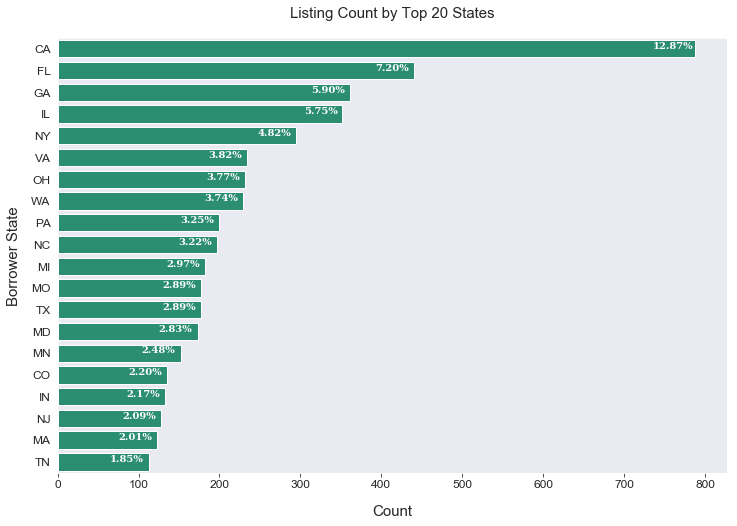

In [26]:
st_cnt=df.BorrowerState.value_counts()[0:20]
st_pct=(df.BorrowerState.value_counts()/df.shape[0]*100)[0:20]

plt.figure(figsize=[12, 8])
top_st20=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:20])]
sb.countplot(data=top_st20,y='BorrowerState', color=pcolor, order=top_st20.BorrowerState.value_counts().index);

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = st_cnt[label.get_text()]
    pct = st_pct[label.get_text()]
    if pct>=1.8:
        plt.text(cnt-27, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif', fontsize=10)
    else:
        plt.text(cnt+27, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif', fontsize=10)

plt.xlabel('Count', labelpad=15, fontsize=15)
plt.ylabel('Borrower State', labelpad=10, fontsize=15)
plt.title('Listing Count by Top 20 States', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('03St20Cnt.png');

### Commentary and next step
Here CA borrowers top the chart at 788 listings (12.87%), and TN at the bottom with slightly over 100 listings (1.85%). 

We will look at _**LoanStatus**_ feature **next**. 

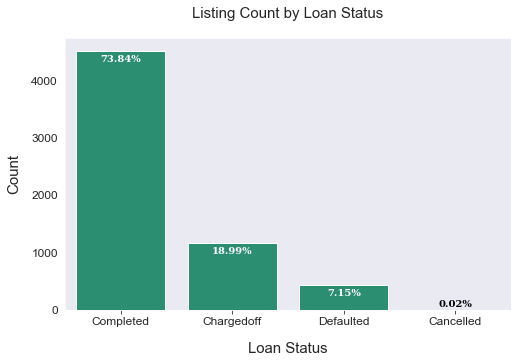

In [27]:
ls_cnt=df.LoanStatus.value_counts()
ls_pct=df.LoanStatus.value_counts()/df.shape[0]*100

plt.figure(figsize=[ 8, 5])
ax = sb.countplot(x='LoanStatus', data=df, order=df.LoanStatus.value_counts().index, color=pcolor)

locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    cnt = ls_cnt[label.get_text()]
    pct = ls_pct[label.get_text()]
    if pct>5:
        plt.text(loc, cnt-190, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(loc, cnt+50, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
plt.xlabel('Loan Status', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Loan Status', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('04lsCnt.png');

### Commentary and next step
We can see majority of loans (73.84%) is in _**Completed**_ status, although _**Charged Off**_ and _**Defaultd**_ statuses at 26.14% combined seems high. Given loan repayment ability is tied to earnings of borrowers, the **next** feature to inspect is borrower employment status. 

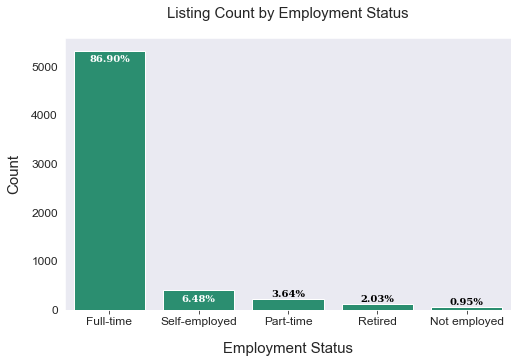

In [28]:
em_cnt=df.EmploymentStatus.value_counts()
em_pct=df.EmploymentStatus.value_counts()/df.shape[0]*100

plt.figure(figsize=[8, 5])
ax = sb.countplot(x='EmploymentStatus',data=df, order=df.EmploymentStatus.value_counts().index,color=pcolor)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    cnt = em_cnt[label.get_text()]
    pct = em_pct[label.get_text()]
    if pct>=6:
        plt.text(loc,cnt-230,'{:0.2f}%'.format(pct),ha='center',
                 color = 'w',fontweight='bold',fontfamily='serif')
    else:
        plt.text(loc,cnt+40,'{:0.2f}%'.format(pct),ha = 'center',
                 color='k',fontweight='bold',fontfamily='serif')
        
plt.xlabel('Employment Status', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Employment Status', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('05lsCnt.png');

### Commentary and next step
Here, we can see _**Unemployed**_ at under 1% is unlikely responsible for charged off or defaulted loans. _**Part-time**_ and _**Retired**_ at 2.03% and 3.64% respectively are pretty low to be the major contributing factor either.  We will look at it again with other features in bivariate or multivariate explorations. 

**Next** up, we will look at listing distribution by credit ranking. 

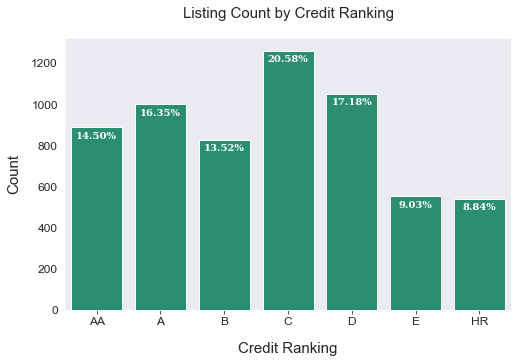

In [29]:
cr_cnt=df.CrRanking.value_counts().loc[[i for i in ['AA','A','B','C','D','E','HR']]]
cr_pct=cr_cnt/df.shape[0]*100

plt.figure(figsize=[8, 5])
ax = sb.countplot(x='CrRanking', data=df2, order=['AA','A','B','C','D','E','HR'], 
                  color=pcolor)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    cnt = cr_cnt[label.get_text()]
    pct = cr_pct[label.get_text()]
    if pct>5:
        plt.text(loc,cnt-55,'{:0.2f}%'.format(pct),ha='center',
                 color = 'w',fontweight='bold',fontfamily='serif')
    else:
        plt.text(loc,cnt,'{:0.2f}%'.format(pct),ha = 'center',
                 color='k',fontweight='bold',fontfamily='serif')
        
plt.xlabel('Credit Ranking', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Credit Ranking', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('06crCnt.png');

### Commentary and next step
Here, credit ranking C tops the chart at 20.58% of the listing, followed by D at 17.18%. Both groups have more listings than that in AA, A and B groups. This is logical given the higher a rating score, the lower the number of qualified borrowers. 

**Next**, we will look at the distribution of listing amount and wrap up this section. 

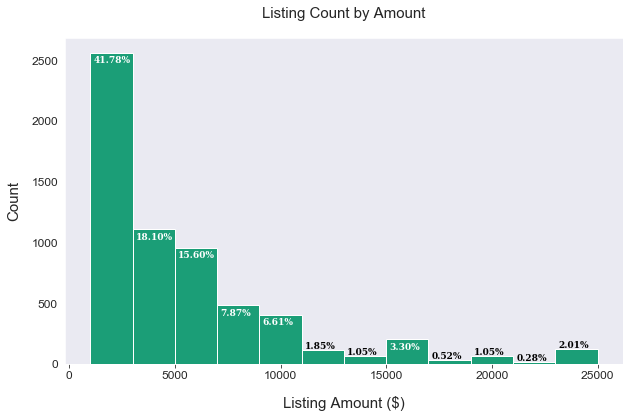

In [30]:
plt.figure(figsize=(10,6))
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1000, 2000)
n,bins,rect = plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=pcolor)
pts=sum(n)
          
plt.xlabel('Listing Amount ($)', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Amount', pad=20, fontsize=15);

ax = plt.gca()
for ind in range(len(rect)):
    loc=bins[ind]
    cnt=n[ind]
    pct=int(n[ind])/pts*100
    if pct>3:
        ax.text(loc+150,cnt-80,'{:0.2f}%'.format(pct), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize=9)
    else:
        ax.text(loc+150,cnt+10,'{:0.2f}%'.format(pct), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize=9) 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('07amtCnt.png');

### Commentary and next step
We can tell from the chart the shape of data is _**right skewed**_, which is inline with our expectation that listing frequencies drop as listing values increase.

The highest frequency at 41.78% has listing amount between 1000 and 3000,  second highest frequency at 18.10%, amount between 3000 and 5000,  and then 15.60%, amount between 5000 to 7000. After that point, frequency started to drop sharply to 7.87%. It is clear the most in demand listings have smallest loan values.

**Next up,** section closing summary

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Distributions of listing categories, borrower professions and states tell us majority of listings were for debt consolidation, most of the borrowers held professional jobs and residents of CA had the highest number of listings. 


- Distribution of listing amount shows majority of loan listings were below \$3000 in values, employment status distribution shows a combined 97.02% of borrowers were in full, self or part time employment statuses. Yet listings in charged off and defaulted statuses is significant at 26.14% combined. Might this be due to the 3 historical significant events of interest to us? We will find out more in bivariate or multivariate sections. There was no unusual points needing transformation operations in this section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Though our investigation did not find unusual distributions, we did performe tidy, adjust and tranform operations to get the data to the desired form for our exploration and visualization. For examples:

  * merged CreditGrade, ProsperRating(Alpha) into one as both are of same ranking scheme.
  * mapped borrower occupations from 67 into 9 categories based on [ISCO classification standard](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Occupations) and numeric listing category codes to their respective listing category descriptions.  
  * engineered new variables to represent total loan amount and total outstanding (inclusive of loan listing) for all borrowers, express APR in percentage. 

## Bivariate Exploration

We will start digging deeper to discover relationships between pairs of features in the dataset.

Previously in univariate exploration, we looked at listing distribution by category, let's take a quick look at listing amount distribution in each listing category to get a sense of loan size frequencies in each category.

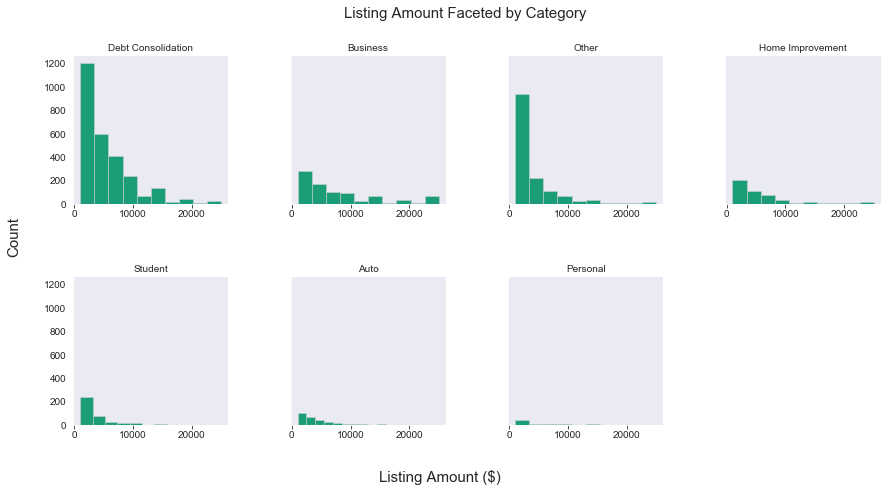

In [31]:
kws = dict(linewidth=.5, edgecolor='#d4d1d1', color=pcolor)
g = sb.FacetGrid(df2, col='LoanCat', col_wrap=4)

g.map(plt.hist, 'LoanOriginalAmount', **kws)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

g.set_titles('{col_name}');
g.set(xlabel='', ylabel='')

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=0, y=.01)

plt.suptitle("Listing Amount Faceted by Category", fontsize=15, y=1.06);
g.fig.text(0.4, -0.04, s='Listing Amount ($)',fontdict={'fontsize':15});
g.fig.text(-0.03, 0.55, s='Count',fontdict={'fontsize':15}, rotation = 90);
plt.savefig('08amtCatCntFacet.png');

### Commentary and next step
Here we can see the highest frequency listing amount in each category is in the \$3000 and under bracket, this is consistent with what we saw in listing amount distribution previously in univariate exploration. 

**Next** up, we will look at listing distribution by borrowers' occupations, also listing distribution by borrowers' credit ranking in their resident states focusing on the top 5 borrower states (for their more significant proportion of listing frequency distribution observed in univariate exploration).


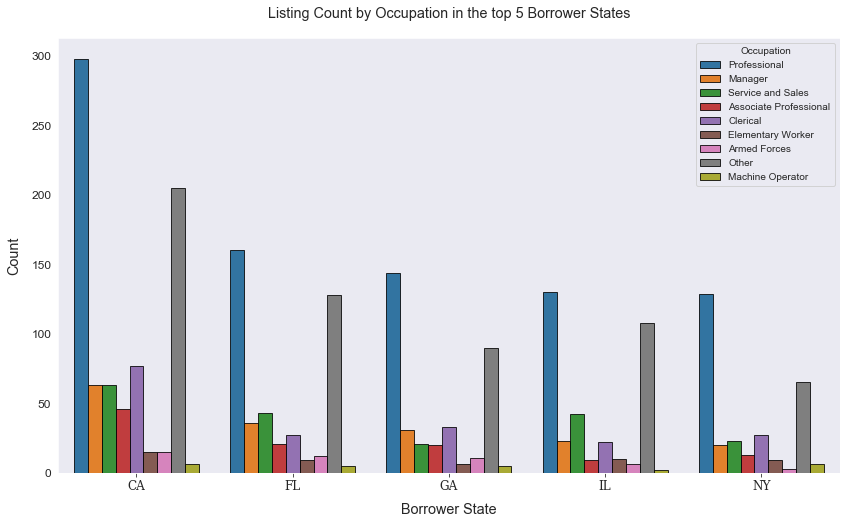

In [32]:
top_st5=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]
plt.figure(figsize=(14, 8))
sb.countplot(data=top_st5, x='BorrowerState',palette='tab10',
             hue='Occupation', edgecolor='k', linewidth=0.8,
             order=df.BorrowerState.value_counts().index[0:5])

locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')
plt.xlabel('Borrower State', labelpad=10, fontsize='x-large')
plt.ylabel('Count', labelpad=10, fontsize='x-large')
plt.title('Listing Count by Occupation in the top 5 Borrower States',pad=20, fontsize='x-large');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('09occStCnt.png');

### Commentary and next step
Within each state, frequency of the top 2 listing distributions mirrors that of the top 2 professions observed in univariate exploration, where _**Professional**_ job holders had the highest frequency, followed by job holders in _**Other**_ profession group. 

However, listing distributions of the remaining occupation groups do vary across states and not necessary mirror their corresponding listing distribution trends observed in univariate exploration. For instance, _**Service and Sales**_ and _**Clerical**_ groups rank third and forth respectively in listing frequency in univariate exploration, but no longer the case across borrower states in bivariate exploration.

**Next**, listing distribution by borrowers' credit ranking in the top 5 borrower states 

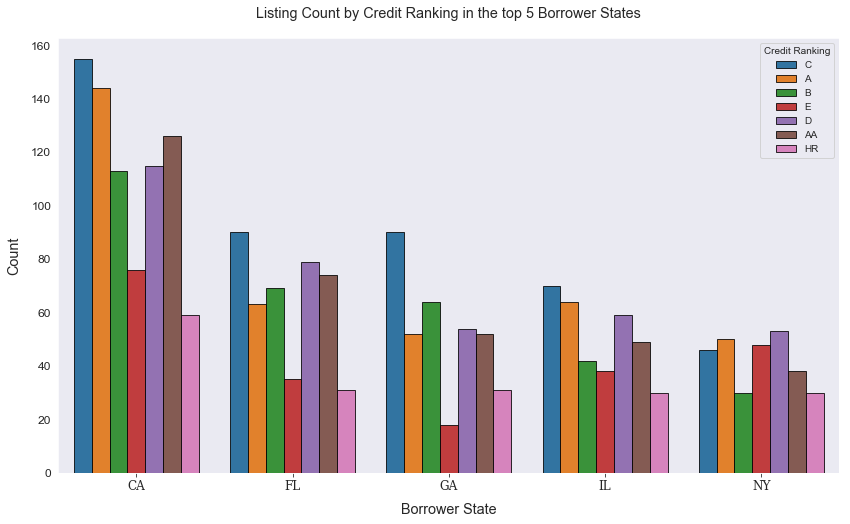

In [33]:
top_st5=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]
plt.figure(figsize=(14, 8))
sb.countplot(data=top_st5, x='BorrowerState',
             hue='CrRanking', edgecolor='k', linewidth=0.8,
             order=df.BorrowerState.value_counts().index[0:5])

plt.legend(title='Credit Ranking');
locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')
plt.xlabel('Borrower State', labelpad=10, fontsize='x-large')
plt.ylabel('Count', labelpad=10, fontsize='x-large')
plt.title('Listing Count by Credit Ranking in the top 5 Borrower States',pad=20, fontsize='x-large');
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('10crStCnt.png');

### Commentary and next step
In univariate exploration, we saw listing frequency distribution by credit ranking rank in the order of C, D, A, AA, B, E and HR. However, that frequency order no longer holds true when we look at them here with an additional feature, the _**Borrower State**_. 

Let's take a look at the relationship between listing amount and credit ranking **next**, to see if inclusion of a new feature causes the trend observed in univariate exploration to change.  

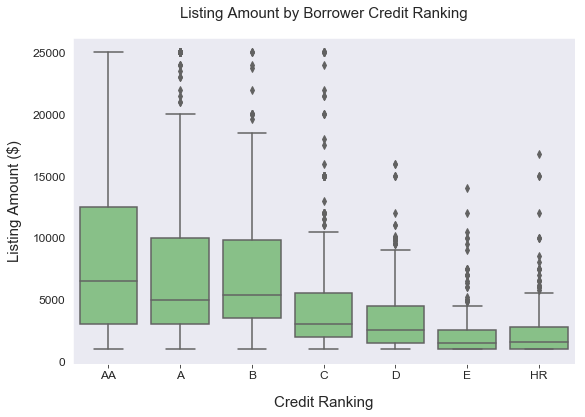

In [34]:
plt.figure(figsize=(9, 6))
ax = sb.boxplot(x='CrRanking', y='LoanOriginalAmount', #hue='CrRankType',
                 data=df2, color=sb.color_palette('Accent', 8)[0], #palette='Set3',
                 order=['AA','A','B','C','D','E','HR'],
                 orient='v');
'''
plt.legend(title='Rating Period', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');
plt.yticks([0,5000,10000,15000,20000,25000],
           ['0','5k','10k','15k','20k','25k'])
'''           
plt.xlabel('Credit Ranking', labelpad=15, fontsize=15)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=15)
plt.title('Listing Amount by Borrower Credit Ranking', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('11amtCrDist.png');

### Commentary and next step
This shows the median listing amount in each credit ranking is below \$7500 (consistent with small listing amount we have observed), with the median amount decreasing with credit ranking quality. 

Although in univariate exploration, credit ranking C and D rank higher in listing frequency than AA, A and B, they do not hold the first and second spots in listing amount distribution here. 

Before wrapping up this section, we will take a look at the relationship between borrowers' monthly income and listing amount. 

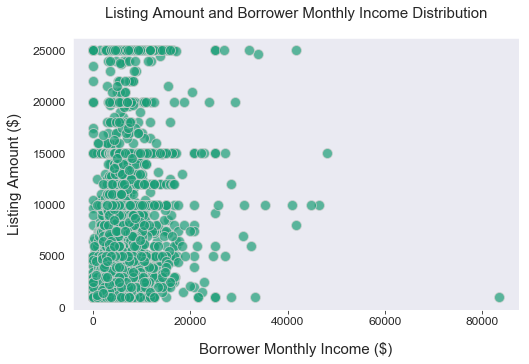

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(df.StatedMonthlyIncome, df.LoanOriginalAmount, 
            alpha=0.7, color=pcolor, s=100, edgecolor='#d4d1d1');

plt.xlabel('Borrower Monthly Income ($)', labelpad=15, fontsize=15)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=15)
plt.title('Listing Amount and Borrower Monthly Income Distribution', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('12amtIncDist.png');

### Commentary and next step
Here we can see the distribution is concentrated in monthly income below 20,000 and listing amount below 10,000 brackets. Again the trend is smaller loan amounts topping the chart. The concentration in lower income brackets could be due to factors beyond what we can see in our dataset.

**Next**, section closing summary.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part of exploration, we observed that listing amount distribution is concentrated in lower end of loan values, _**well below \$10,000**_. This is consistent with our finding in univariate exploration. We also see that adding a second feature to previously explored features can cause distribution trends to vary, as seen here in the two scenarios where _**Occupation**_ and _**Credit Ranking**_ were added in turn to listing distribution in the top five borrower states. In both cases, the listing distributions vary from their corresponding distributions in univariate exploration.

## Multivariate Exploration

In this section, we will first add another feature _**Borrower APR**_ to the bivariate distribution of Listing Amount and Credit Ranking explored previously, and check if this third feature strengthens the other two features.  

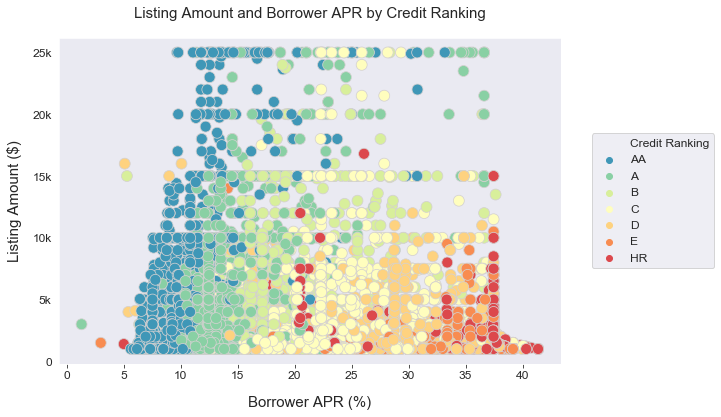

In [36]:
plt.figure(figsize=(9, 6))
ax = sb.scatterplot(x='APRPct', y='LoanOriginalAmount', data=df2,
                    hue='CrRanking', s=120, edgecolor='#d4d1d1', 
                    hue_order=['AA','A','B','C','D','E','HR'],
                    palette='Spectral_r'); 

plt.legend(loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large').texts[0].set_text('Credit Ranking');
plt.yticks([0,5000,10000,15000,20000,25000],
           ['0','5k','10k','15k','20k','25k'])
plt.xlabel('Borrower APR (%)', labelpad=15, fontsize=15)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=15)
plt.title('Listing Amount and Borrower APR by Credit Ranking', pad=20, fontsize=15);

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.savefig('13amtAprCrDist.png');

### Commentary and next step
The new feature _**Borrower APR**_ added to the bivariate Listing Amount and Credit Ranking distribution gives a deeper insight into listing amount distribution across credit ranking, compared with the corresponding distribution in bivariate exploration. 

For instance, we can now see varying concentrations of listing amounts at different APR rates. The trend is, the higher the credit ranking, the lower the APR rate on a loan listing. Here we can see listing amount distribution is concentrated on smaller loan values (under \$10,000) and lower APR rates (under 10% and 15% respectively for credit ranking AA and A).  


**Next,** we will dive a little deeper by adding another feature _**Listing Category**_ to the distribution.   

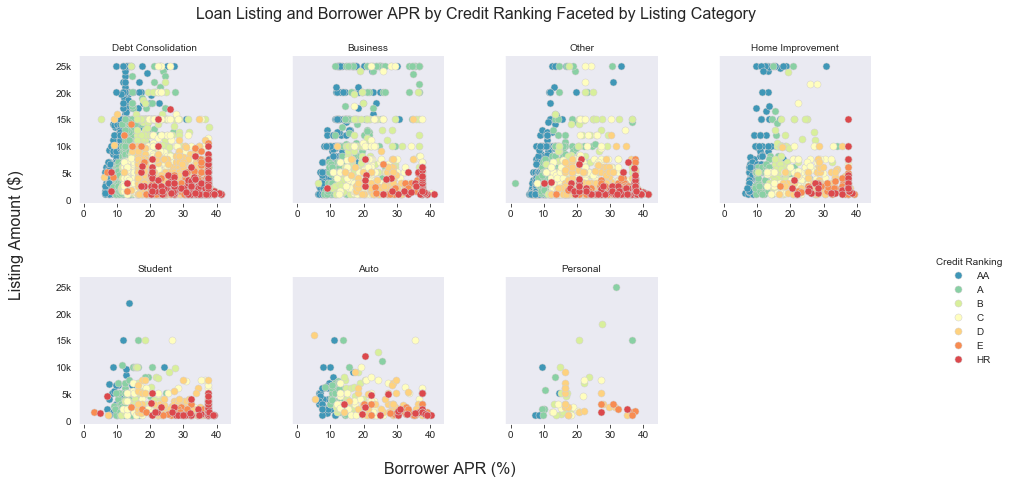

In [37]:
kws = dict(s=50, linewidth=.5, edgecolor='#d4d1d1')
g = sb.FacetGrid(df2, col='LoanCat', hue='CrRanking',
                 hue_order=['AA','A','B','C','D','E','HR'],
                 palette='Spectral_r', col_wrap=4)

g.map(plt.scatter, 'APRPct','LoanOriginalAmount', **kws).add_legend();

g._legend.set_title('Credit Ranking')
g.set_titles('{col_name}');
g.set(xlabel='', ylabel='')

for i, ax in enumerate(g.axes):
    plt.setp(ax.get_xticklabels(), visible=True, rotation=0, y=.01)
    plt.setp(ax.set_yticklabels(['-5k','0','5k','10k','15k','20k','25k','30k']), rotation=0)

g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.4, 0, 0));

plt.subplots_adjust(hspace=0.5, wspace=0.4)    
plt.suptitle("Loan Listing and Borrower APR by Credit Ranking Faceted by Listing Category", fontsize=16, y=1.06);
g.fig.text(0.4, -0.02, s='Borrower APR (%)',fontdict={'fontsize':16});
g.fig.text(-0.01, 0.65, s='Listing Amount ($)',fontdict={'fontsize':16}, rotation = 90);
plt.savefig('14amtAprCrCatDistFacet.png');

### Commentary and next step
The same general trend of smaller listing amount and lower APR dominated by AA and A credit ranking still prevails, however, we now also gain a new insight into credit ranking concentration in listing amount distribution across different listing categories. 

Here, listing categories _**Debt Consolidation**_ and _**Other**_ have the highest and second highest concentration of the worse credit ranking HR with high APR (in 20% to 40% range) on small listing values (\$5000 and under). 

**Next**, we will move on to look at what effect the _**2008 Great Recession**_ and _**November 2008 SEC's cease and desist order on Prosper**_ and its _**July 2009 Post SEC Relaunch**_ events may have on listing trend between 1 July 2008 and 31 December 2009.

We will start by looking at the trend for total principal borrowed and amount in delinquent during the stated time period. 

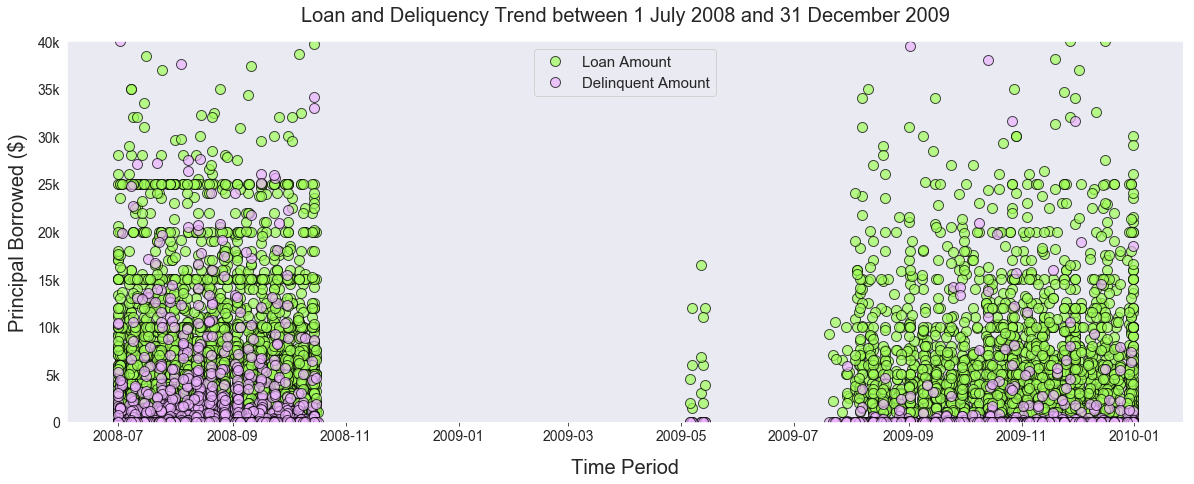

In [38]:
sb.set_style('dark', {'xtick.bottom': True})
period = pd.to_datetime(df.LoanOriginationDate).dt.date
fig, ax = plt.subplots(figsize=(20,7))
plt.plot_date(period, df.ProsperPrincipalBorrowed, color='#A1FE5A',
              marker='o', markeredgecolor='k', linewidth=0.5,
              ms=10, alpha=0.7, label='Loan Amount')
plt.plot_date(period, df.AmountDelinquent, color='#ECB3FF', linewidth=0.5,
              marker='o', markeredgecolor='k', 
              ms=10, alpha=0.7, label='Delinquent Amount')

for tick in ax.get_xticklabels():
    tick.set_fontsize(14)

for tick in ax.get_yticklabels():                       
    tick.set_fontsize(14)

plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000],
           ['0','5k','10k','15k','20k','25k','30k','35k','40k'])    
plt.ylim((0,40000))
plt.legend(fontsize=15)
plt.xlabel('Time Period', labelpad=15, fontsize=20)
plt.ylabel('Principal Borrowed ($)', labelpad=10, fontsize=20)
plt.title('Loan and Deliquency Trend between 1 July 2008 and 31 December 2009', pad=20, fontsize=20);
plt.savefig('15amtDelinTimeDist.png');

### Commentary and next step
Here we can see between July to November 2008 in the midst of recession up till Prosper was served the SEC cease and desist order, a heavy concentration of loans borrowed (5,000 or less in values) and in delinquent (15,000 or less in values).

There was no listing activity from there on till May 2009 where a sparse distribution of small listing amount (primarily in under 10,000 bracket) surfaced again, followed by a full-fledged listing activities after July 2009. The quiet period matches the time frame of Proper's operation suspension from November 2008 till its relaunch in July 2009. 

Notice a rather light distribution of loans in delinquent in the _**post 2009 SEC Relaunch**_ time frame - likely due to the effect of the new Prosper loan underwriting policies, where borrowers must meet stringent credit rating standard to receive Prosper loans, and borrowers who received loans prior to 2009 would no longer qualify for a loan, at any rate. See [here, under Loan performance](https://en.wikipedia.org/wiki/Prosper_Marketplace) for details. 

**Next** up, we will compare distribution of listing amount by credit ranking in the _**pre**_ and _**post**_ July 2009 periods.  

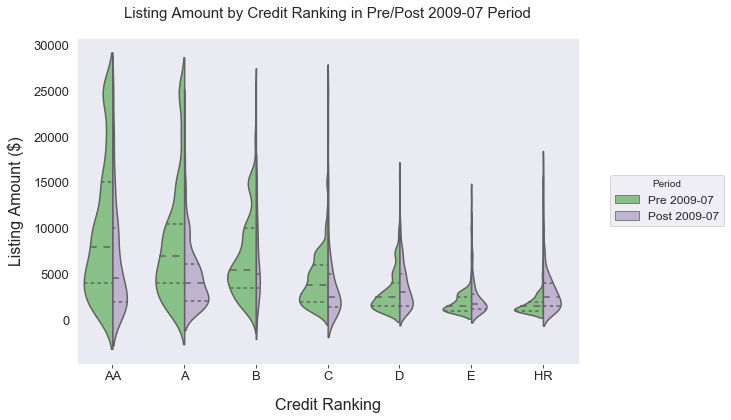

In [39]:
plt.figure(figsize=(9, 6))
ax = sb.violinplot(x='CrRanking', y='LoanOriginalAmount', hue='CrRankType',
                   data=df2, palette='Accent', split=True, inner='quartile',
                   order=['AA','A','B','C','D','E','HR'], scale='count');

plt.legend(title='Period', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');           
    
plt.xlabel('Credit Ranking', labelpad=15, fontsize=16)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=16)
plt.title('Listing Amount by Credit Ranking in Pre/Post 2009-07 Period', pad=20, fontsize=15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.savefig('16amtCrPeriodDist.png');

### Commentary and next step
We can see a clear contrasting trend of listing amount distribution for the two time periods, where the listing amount distribution across credit rankings is much more pronounced in the _**pre**_ than in the _**post July 2009**_ period.

**Next**, compare distribution of listing amount by listing category in the _**pre**_ and _**post July 2009**_ periods.

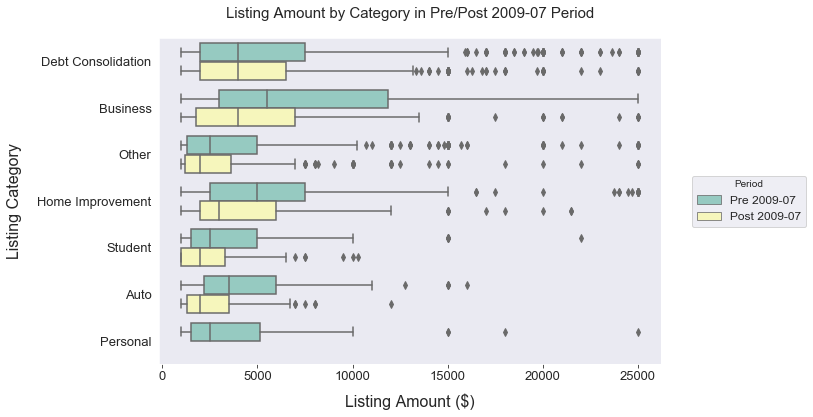

In [40]:
plt.figure(figsize=(9, 6))
ax = sb.boxplot(x='LoanOriginalAmount', y='LoanCat', hue='CrRankType',
                 data=df2, palette='Set3', 
                 orient='h');

plt.legend(title='Period', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');

plt.xlabel('Listing Amount ($)', labelpad=10, fontsize=16)
plt.ylabel('Listing Category', labelpad=15, fontsize=16)
plt.title('Listing Amount by Category in Pre/Post 2009-07 Period', pad=20, fontsize=15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.savefig('17amtCatPeriodDist.png');

### Commentary and next step
Here we see post July 2009 period has no listing amount in _**Personal**_ category, the median listing amount in _**Debt Consolidation**_ category remains constant and decreases across _**Business**_, _**Other**_, _**Home Improvement**_, _**Student**_ and _**Auto**_ categories.

**Next**, section closing summary.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section we observed that adding a related new feature to a bivariate distribution does result in the related features strengthening each other. This is evident by the examples explored here, for instance:
- adding a third feature _**Borrower APR**_ to the bivariate distribution of listing amount and credit ranking adds visibility to varying concentrations of listing amounts at different APR rates.


- adding a fourth feature _**Listing Category**_ to multivariate distribution of listing amount and borrower APR by credit ranking enables visibility to segmentation of borrower APR on listing amount and credit ranking by listing category. 


- the three features _**Time**_, _**Principal borrowed**_ and _**Delinquent amount**_ enhance each other and yield a clear trend on principal borrowed and linquent amount between 1 July 2008 and 31 December 2009.


- the three features _**Listing amount**_, _**Credit ranking**_ and _**Period**_ enhance each other and enable comparison of listing amount and credit ranking distribution in two different time periods.


- the three feature _**Listing amount**_, _**Listing category**_ and _**Period**_ enhance each other and add visibility to listing amount and listing category distribution in two different time periods.

### Exploration Closing Summary
Through univariate, bivariate and multivariate explorations, we were able to look at features pertaining to Prosper borrowers, loan listings and time periods in the dataset to study their influences on Prosper loan distributions, and see the effect of the three historical significant events on Prosper loan listings between 1 July 2008 and 31 December 2009. 

# References

### Udacity Data Visualization 
[Lesson 3-4 : Absolute vs Relative Frequency](https://youtu.be/FpnZ7dH4FqU)

[Lesson 4-9 : Clustered Bar Charts](https://youtu.be/0rFp55TtEJM)

[Lesson 4-11 : Faceting](https://youtu.be/oUYRqI6wFGw)

[Lesson 5-2 : Non-Postional Encodings for Third Variables](https://youtu.be/D91mm-qaDkk)

[Lesson 5-3 : Color Palettes](https://youtu.be/nirOTWkuiSM)

[Lesson 5-5 : Faceting in Two Directions](https://youtu.be/lz5dcoTcV2o)

[Lesson 6-8 : Creating a Slide Deck with Jupyter](https://youtu.be/qIot9qrvcF8)


### Miscellaneous Online References 
[How to Pick the Perfect Color Combination for Your Data Visualization](https://blog.hubspot.com/marketing/color-combination-data-visualization)

[Matplotlib cmap reference](https://matplotlib.org/gallery/color/colormap_reference.html)

[Scatterplot with hue](https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/)

[Ticklabel formatter](https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi)

[How to specify legend position in matplotlib in graph coordinates](https://stackoverflow.com/questions/44413020/how-to-specify-legend-position-in-matplotlib-in-graph-coordinates)

[Time Series Data Visualization with Python](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

[Color tutorial](https://www.codecademy.com/articles/seaborn-design-ii)